In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Load Image data

In [30]:
road=cv2.imread('./data/road0.png', 1)

In [31]:
img=cv2.cvtColor(road, cv2.COLOR_BGR2RGB)

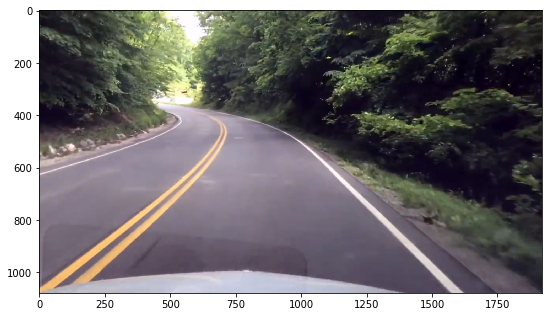

In [32]:
fig=plt.figure(figsize=(9,12))
plt.imshow(img)
plt.show()

### Region of Interest

In [33]:
H,W,C = img.shape

In [34]:
print(H,W,C)

1079 1919 3


In [35]:
fig=plt.figure(figsize=(9,12))
cv2.imshow('reoad', road)
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 648x864 with 0 Axes>

In [36]:
gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

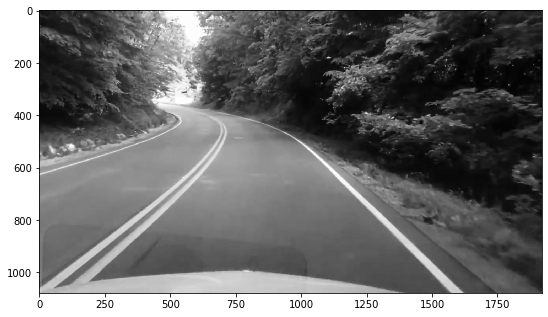

In [37]:
fig=plt.figure(figsize=(9,12))
plt.imshow(gray,cmap='gray')
plt.show()

In [38]:
gray=cv2.GaussianBlur(gray,(3,3),0)


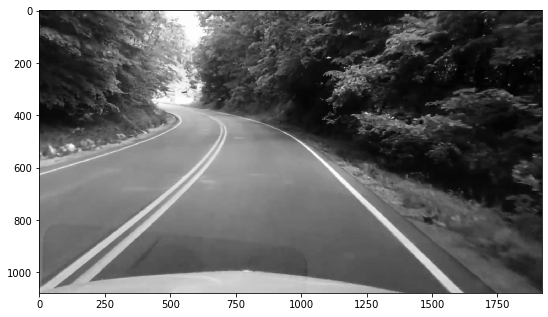

In [39]:
fig=plt.figure(figsize=(9,12))
plt.imshow(gray, cmap='gray')
plt.show()

In [40]:
edges=cv2.Canny(gray,50,180)

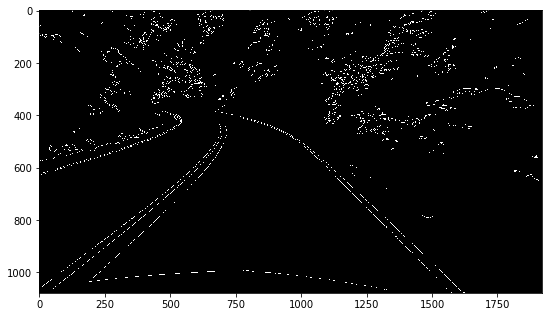

In [41]:
fig=plt.figure(figsize=(9,12))
plt.imshow(edges,cmap='gray')
plt.show()

In [42]:
ROI=[(0,H*0.9), (W,H*0.9), (2*W/3,2*H/5),(W/3,2*H/5)]

In [43]:
def reg_o_interest(img,vertices):
    mask=np.zeros_like(img)
    # chal=img.shape[2]
    match_mask_color=255
    cv2.fillPoly(mask, np.array([vertices],np.int32), match_mask_color)
    masked_img=cv2.bitwise_and(img,mask)
    return masked_img

In [44]:
cropped=reg_o_interest(edges,ROI)

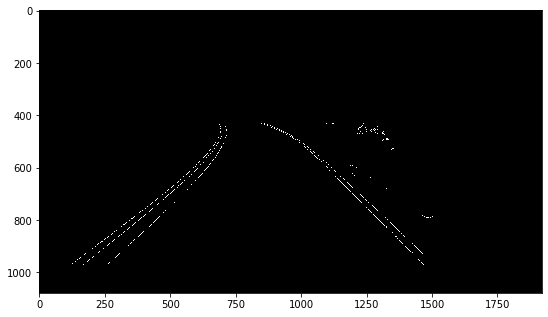

In [45]:
fig=plt.figure(figsize=(9,12))
plt.imshow(cropped, cmap='gray')
plt.show()

### Edge Detection

### Hough lines

In [46]:
lines=cv2.HoughLinesP(cropped,rho=3,theta=np.pi/90, threshold=150, lines=np.array([]), minLineLength=5, maxLineGap=20)

In [47]:
print(lines.shape)

(40, 1, 4)


In [48]:
road2=cv2.imread('./data/road2.png', 1)
for line in lines:
    (x1,y1,x2,y2)=line[0]
    cv2.line(road2,(x1,y1),(x2,y2),color=(0,0,255),thickness=5)

In [49]:
# cv2.imshow('roead', road2)
# cv2.waitKey()
# cv2.destroyAllWindows()

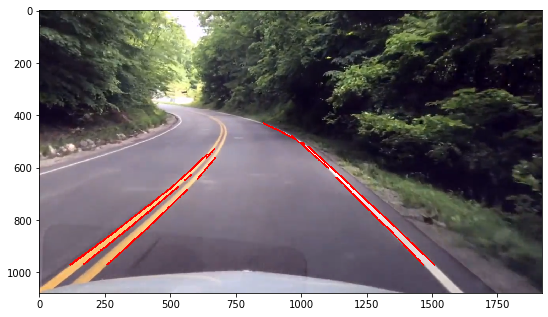

In [50]:
img=cv2.cvtColor(road2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(9,12))
plt.imshow(img)
plt.show()